# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

En este caso nos vamos a centrar en el **método jerárquico**. Este método puede ser aglomerativo o divisivo, dependiendo si partimos de cluster individuales que se van conbinando y que convergen en uno solo o divisivo si es de forma opuesta. 

La gran diferencia con el método K-means es que este no requiere que se especifique de forma previa con cuantos cluster queremos contar. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **VarCovid_provincias**, elaborado a partir de los datos publicados por el INE.

Este dataset está compuesto por el número de fallecidos durante las semanas que duraron las respectivas olas, así como un promedio entre los años 2017, 2018 y 2019 del número de fallecidos en esas mismas semanas y la tasa de variación entre ambas para ver el exceso de muertes que se ha producido. Esta última variable será la que nosotros utilicemos en nuestro estudio. 

Realizado por: Abel Carretero Novillo

## **Jerárquico**

###**Carga de librerias y datos**
Cargamos las librerias que vamos a utilizar en el modelo.

In [52]:
# Preparación de los datos 
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
# Modelado 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
# Visualización
import matplotlib.pyplot as plt


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **VarCovid_provincias**.

In [53]:
from google.colab import files
uploaded = files.upload()

Saving VarCovid_provincias.xlsx to VarCovid_provincias (4).xlsx


Visualizamos los datos del archivo que acabamos de cargar. Al introducir datos.head() nos saldran las 5 primeras filas de forma predeterminada, de querer ver más datos, tendríamos que introducir en el parentesis las filas que queremos observar. 

In [54]:
datos=pd.read_excel('VarCovid_provincias.xlsx')
datos.head()

,provincia,falle_1Ola,falle1_med17_19,1Ola,falle_2Ola,falle2_med17_19,2Ola,falle_3Ola,falle3_med17_19,3Ola,falle_4Ola,falle4_med17_19,4Ola,falle_5Ola,falle5_med17_19,5Ola
0,Total nacional,113148,63962.3,76.9,157968,133844.7,18.0,135225,117257.5,15.3,49445,47465.3,4.2,76307,64803.0,17.8
1,Albacete,1600,553.0,189.3,1287,1172.7,9.7,1186,1060.5,11.8,395,409.3,-3.5,754,588.0,28.2
2,Alicante/Alacant,3011,2403.7,25.3,5852,5082.3,15.1,6474,4602.0,40.7,1775,1781.7,-0.4,2961,2562.0,15.6
3,Almería,851,801.0,6.2,2003,1702.0,17.7,1936,1545.5,25.3,665,605.7,9.8,1040,797.3,30.4
4,Araba/Alava,841,409.7,105.3,1022,934.7,9.3,763,729.0,4.7,331,313.7,5.5,443,420.3,5.4


Creamos las diferentes variables que vamos a utilizar. En primer lugar vamos a llevar a cabo un análisis de las dos primeras olas, para ello, en la variable columnas, seleccionaremos la tasa de variación del exceso de mortalidad de la primera ola y segunda ola. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las provincias.

In [55]:
columnas = ["1Ola", "2Ola"]
resultado = datos[columnas]
provincias = datos["provincia"]

### **Dendrograma**
Para representar gráficamente nuestro modelo, escogeremos una tipología como la del dendrograma, ya que nos permitirá observar los dintintos cluster que se han formado, las relaciones entre las diferentes variables y la distancia entre unas y otras. 

Además, en nuestro caso seleccionaremos que las variables se situen a la izquierda, es decir, situaremos el dendrograma a la derecha, para que podamos leer las variables sin ningún tipo de problema. 

Realizamos un corte en nuestro dendograma para ver cuantos cluster vamos a escoger. Haremos el corte en 30, por lo que tendremos 4 clusters. Para realizarlo utilizaremos la función axvline( ), ya que queremos que la linea sea vertical, dado que hemos orientado el dendograma a la derecha. 

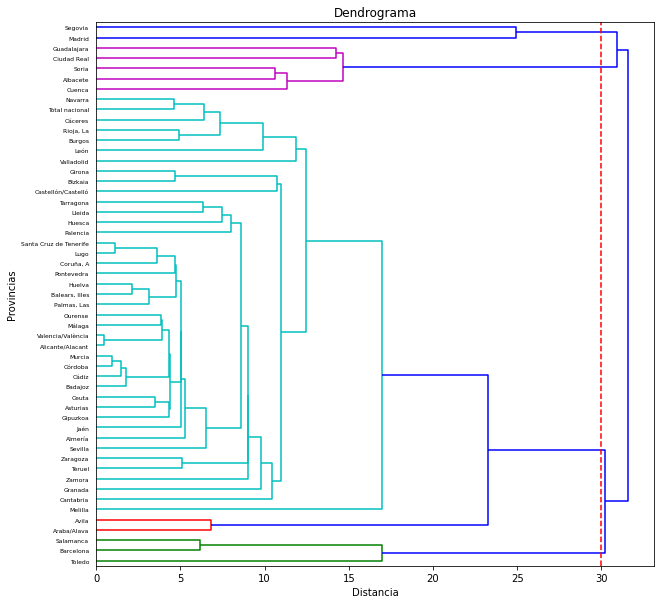

In [56]:
plt.figure(figsize=(10,10))
W = hierarchy.linkage(resultado, 'single')
dendrograma = sch.dendrogram(W,labels=np.array(provincias),orientation='right')

plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Provincias')
plt.axvline(x=30, color='r', linestyle='--')
plt.show()

Visualizando nuestro dendograma podemos establecer las primeras conclusiones, dado que observamos la distancia existente entre las distintas variables. Por ejemplo, la distancia entre Segovia y Madrid es relativamente pequeña. En cambio, la de ambas con Valencia es muy grande.  

### **Matriz de distancias**
Para ver numéricamente la distancia entre nuestras variables (provincias), realizamos la matriz de distancias, la cual nos muestra la distancia euclídea entre los puntos analizados, siendo una matriz *n x n*.

Inicialmente tenemos el vector con las distancias entre los datos analizados, a través de pdist( ). Posteriormente, squareform( ) convierte el vector de distancia en una matriz de distancia. Por último, contruimos nuestra matriz. 
En df.head() podemos establecer cuantas variables queremos visualizar, si lo dejamos vacío () por defecto salen las 5 primeras. 

In [57]:
dist=pdist(resultado)  

DIST=squareform(dist) 

df=pd.DataFrame(DIST,index=provincias,columns=provincias) 
pd.set_option('precision',1)
df.head()

provincia,Total nacional,Albacete,Alicante/Alacant,Almería,Araba/Alava,Asturias,Avila,Badajoz,"Balears, Illes",Barcelona,Bizkaia,Burgos,Cáceres,Cádiz,Cantabria,Castellón/Castelló,Ciudad Real,Córdoba,"Coruña, A",Cuenca,Gipuzkoa,Girona,Granada,Guadalajara,Huelva,Huesca,Jaén,León,Lleida,Lugo,Madrid,Málaga,Murcia,Navarra,Ourense,Palencia,"Palmas, Las",Pontevedra,"Rioja, La",Salamanca,Santa Cruz de Tenerife,Segovia,Sevilla,Soria,Tarragona,Teruel,Toledo,Valencia/València,Valladolid,Zamora,Zaragoza,Ceuta,Melilla
provincia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total nacional,0.0,112.7,51.7,70.7,29.7,52.5,34.6,60.9,63.6,70.4,26.7,11.9,10.1,62.0,44.4,35.5,133.7,63.2,68.4,101.8,46.2,22.1,50.2,134.1,61.6,38.5,56.5,11.3,33.2,73.0,165.0,53.7,63.6,4.6,57.3,30.7,66.2,66.5,7.4,70.4,71.9,179.9,64.9,120.2,37.6,24.0,59.7,51.7,21.1,35.1,24.7,50.3,54.2
Albacete,112.7,0.0,164.2,183.3,84.0,165.2,78.2,173.6,175.9,42.4,138.7,121.4,104.1,174.6,155.8,145.5,21.0,175.9,179.6,11.3,159.0,134.0,161.7,24.6,173.8,149.8,169.2,112.2,145.6,184.2,53.5,166.3,176.3,108.1,169.9,141.4,178.6,178.3,119.0,43.1,183.2,67.3,177.5,10.6,150.3,132.9,58.2,164.1,99.6,142.3,130.6,162.9,160.9
Alicante/Alacant,51.7,164.2,0.0,19.2,80.2,7.5,85.9,10.3,11.9,121.8,25.5,45.5,61.2,10.8,10.8,21.4,185.0,12.2,18.6,153.4,9.7,30.2,19.8,185.8,10.0,23.7,11.7,55.4,22.2,22.9,216.7,3.9,12.9,56.3,6.0,29.8,14.5,15.4,46.3,122.1,21.7,231.1,17.0,171.8,16.0,38.1,111.1,0.5,69.2,36.3,42.8,10.0,36.8
Almería,70.7,183.3,19.2,0.0,99.4,19.0,105.0,9.9,8.5,140.9,44.7,63.6,79.9,8.7,28.9,39.9,204.2,7.6,13.5,172.4,25.2,49.3,28.7,204.8,10.5,38.1,16.9,73.5,39.3,13.6,235.6,17.0,7.4,75.3,13.4,45.8,5.3,9.7,64.9,141.0,13.0,250.2,10.8,190.8,33.6,54.7,129.6,19.3,87.3,50.2,58.9,22.1,43.2
Araba/Alava,29.7,84.0,80.2,99.4,0.0,81.8,6.8,89.9,91.9,42.0,54.7,40.2,23.3,90.8,71.7,61.5,104.9,92.1,95.6,73.5,75.6,50.1,79.9,106.4,89.8,68.1,86.0,33.0,62.9,100.2,137.0,82.6,92.6,25.2,86.0,60.1,94.7,94.3,36.7,43.1,99.2,150.8,94.3,92.1,67.0,52.6,37.0,80.1,26.5,63.3,51.9,79.7,82.7


Una vez sabemos los cluster que vamos a utilizar, en nuestro caso 4, llamamos a la función AgglomerativeClustering(), le indicamos el númro de clusters, la métrica utilizada para relacionar las distancias, en este caso 'euclidean' y el método 'ward' como método general, que identifica los 2 clusters donde la suma de sus varianzas es menor, basandose en el valor óptimo de una función objetivo. 

Vamos a escalar nuestro DataFrame (resultado), para ello utilizaremos la función scale(). Además, llamamos a la función fit_predict para llevar a cabo nutro agrupamiento y así crear el array con la asignación de clusters. 

In [58]:
from sklearn.cluster import AgglomerativeClustering
clusters= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
resultado_escalado = scale(resultado)
clusters.fit_predict(resultado_escalado)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 3, 1, 0, 3, 1, 0, 0,
       2, 1, 0, 2, 0, 2, 0, 3, 1, 0, 0, 0, 0, 2, 0, 3, 0, 1, 3, 1, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2])

Plasmamos en una tabla la asignación de los clusters a nuestras provincias. clusters.labels_ es el array que hemos hecho anteriormente y que contiene el cluster al que petenece cada provincia. 

In [59]:
clusters.labels_provincia=pd.concat([provincias,pd.DataFrame(clusters.labels_)],axis=1)
clusters.labels_provincia.rename(columns={"provincia":"Provincias",0:"Cluster"},inplace=True)
clusters.labels_provincia

,Provincias,Cluster
0,Total nacional,0
1,Albacete,1
2,Alicante/Alacant,0
3,Almería,0
4,Araba/Alava,0
5,Asturias,0
6,Avila,0
7,Badajoz,0
8,"Balears, Illes",0
9,Barcelona,1


### **Visualización gráfica**
Vamos a plasmar gráficamente la situación de los puntos en el plano. Lo primero que haremos será definir nuestra función, en este caso situación. Después, utilizaremos la función ax.text( ) para que salgan los nombres de las provincias, así como ax.set_xlim y ax.set_ylim para decirles en que puntos se mueven nuestros ejes. Por último, fig.set_figheight( ) y fig.set_figwidth( ) nos proporcionan la altura y anchura de nuestro gráfico respectivamente. 


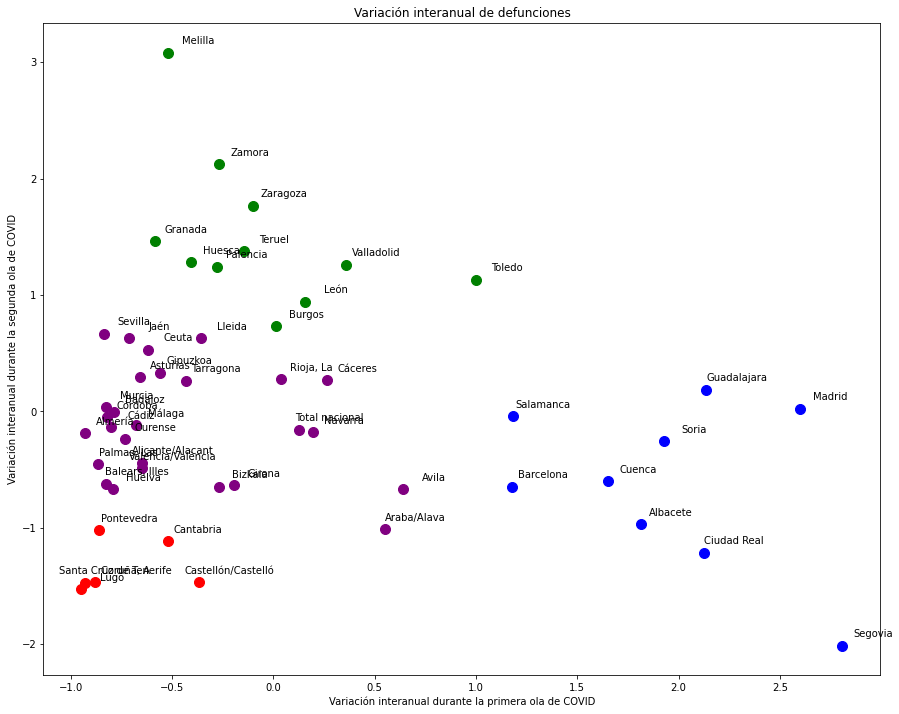

In [60]:
def situacion(x,y,z):
    fig, ax = plt.subplots()
    for i in range(53):       
      ax.text(x[i]+0.15,y[i]+0.1, z[i], color = 'black', ha = 'center', va = 'center') 
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la primera ola de COVID')
    ax.set_ylabel('Variación interanual durante la segunda ola de COVID')
    fig.set_figheight(12)
    fig.set_figwidth(15)
    fig.show()
    plt.scatter(resultado_escalado[clusters.labels_==0,0],resultado_escalado[clusters.labels_==0,1],s=100, c='purple',label='Cluster1')
    plt.scatter(resultado_escalado[clusters.labels_==1,0],resultado_escalado[clusters.labels_==1,1],s=100, c='blue',label='Cluster2')
    plt.scatter(resultado_escalado[clusters.labels_==2,0],resultado_escalado[clusters.labels_==2,1],s=100, c='green',label='Cluster3')
    plt.scatter(resultado_escalado[clusters.labels_==3,0],resultado_escalado[clusters.labels_==3,1],s=100, c='red',label='Cluster4')

situacion(resultado_escalado[:,0],resultado_escalado[:,1],provincias)

Viendo los resultados en el gráfico, podemos extraer que el cluster rojo corresponde a las provincias donde hubo un menor exceso de fallecimientos en ambas olas, el cluster morado corresponde a las provincias donde el exceso de muertes no presenta grandes diferencias entre ambas olas, con alguna excepción, como el caso de Ávila o Álava, donde el peso de la primera ola es mayor. Las provincias que se encuentran en el cluster de color azul presentan un gran exceso de fallecimientos en la primera ola, mucho mayor a los de la segunda ola, el ejemplo más claro de ello es el caso de Segovia. Por último, las provincias que se encuentran en el cluster de color verde son las que presentan un mayor exceso de fallecimientos en la segunda ola de Covid, Melilla es el ejemplo más claro ya que es la que presenta un mayor exceso de muertes en esta ola. 

### **Otras olas**
Ahora, vamos a analizar los efectos en la tercera y quinta ola en lo que a exceso de fallecimiento se refiere. 

In [61]:
datos=pd.read_excel('VarCovid_provincias.xlsx')
datos.head()

,provincia,falle_1Ola,falle1_med17_19,1Ola,falle_2Ola,falle2_med17_19,2Ola,falle_3Ola,falle3_med17_19,3Ola,falle_4Ola,falle4_med17_19,4Ola,falle_5Ola,falle5_med17_19,5Ola
0,Total nacional,113148,63962.3,76.9,157968,133844.7,18.0,135225,117257.5,15.3,49445,47465.3,4.2,76307,64803.0,17.8
1,Albacete,1600,553.0,189.3,1287,1172.7,9.7,1186,1060.5,11.8,395,409.3,-3.5,754,588.0,28.2
2,Alicante/Alacant,3011,2403.7,25.3,5852,5082.3,15.1,6474,4602.0,40.7,1775,1781.7,-0.4,2961,2562.0,15.6
3,Almería,851,801.0,6.2,2003,1702.0,17.7,1936,1545.5,25.3,665,605.7,9.8,1040,797.3,30.4
4,Araba/Alava,841,409.7,105.3,1022,934.7,9.3,763,729.0,4.7,331,313.7,5.5,443,420.3,5.4


In [62]:
columnas = ["3Ola", "5Ola"]
resultado = datos[columnas]
provincias = datos["provincia"]

#### **Dendograma**

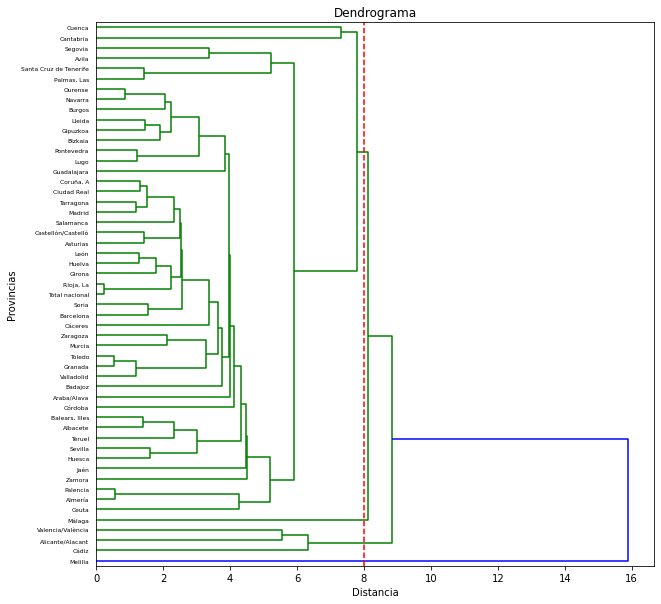

In [63]:
W = hierarchy.linkage(resultado, 'single')
plt.figure(figsize=(10,10))
dendrograma = sch.dendrogram(W,labels=np.array(provincias),orientation='right')
plt.axvline(x=8, color='r', linestyle='--')
plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Provincias')
plt.show()

#### **Matriz de distancias**

In [64]:
dist=pdist(resultado)  

DIST=squareform(dist) 

df=pd.DataFrame(DIST,index=provincias,columns=provincias) 
pd.set_option('precision',1)
df.head()

provincia,Total nacional,Albacete,Alicante/Alacant,Almería,Araba/Alava,Asturias,Avila,Badajoz,"Balears, Illes",Barcelona,Bizkaia,Burgos,Cáceres,Cádiz,Cantabria,Castellón/Castelló,Ciudad Real,Córdoba,"Coruña, A",Cuenca,Gipuzkoa,Girona,Granada,Guadalajara,Huelva,Huesca,Jaén,León,Lleida,Lugo,Madrid,Málaga,Murcia,Navarra,Ourense,Palencia,"Palmas, Las",Pontevedra,"Rioja, La",Salamanca,Santa Cruz de Tenerife,Segovia,Sevilla,Soria,Tarragona,Teruel,Toledo,Valencia/València,Valladolid,Zamora,Zaragoza,Ceuta,Melilla
provincia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total nacional,0.0,11.0,25.4,16.1,16.3,7.7,17.0,7.7,11.4,5.1,10.7,15.2,4.5,17.4,26.3,8.2,2.7,7.7,3.8,27.5,12.6,3.3,5.7,8.1,3.5,14.6,11.9,2.2,13.8,17.5,6.2,22.6,7.6,15.5,16.2,15.6,17.5,16.5,0.2,5.0,17.0,13.7,14.5,4.1,5.2,11.7,6.1,20.1,7.1,20.5,6.4,12.7,24.8
Albacete,11.0,0.0,31.5,13.6,23.9,18.6,14.5,12.0,1.4,8.8,15.1,19.8,9.2,22.1,30.0,19.2,13.7,5.7,14.4,28.3,16.2,8.2,13.8,11.3,7.6,4.0,19.6,8.8,17.7,20.2,16.7,16.1,18.3,21.2,22.0,13.5,11.6,18.9,11.2,14.1,10.4,12.5,4.7,10.1,15.5,3.7,14.4,27.0,15.5,26.5,16.6,13.8,35.4
Alicante/Alacant,25.4,31.5,0.0,21.4,37.4,25.2,42.3,19.8,32.7,23.5,35.7,39.3,29.9,9.5,49.8,23.9,25.2,32.0,26.1,52.4,37.6,25.6,19.8,33.5,27.3,35.3,34.3,26.7,38.5,42.3,26.8,28.2,20.6,38.9,39.2,21.1,41.9,41.4,25.5,28.9,41.0,39.0,36.2,22.9,27.1,34.4,19.3,5.6,18.3,42.6,20.2,18.3,34.6
Almería,16.1,13.6,21.4,0.0,32.4,22.3,27.8,9.4,15.0,11.1,25.6,30.5,18.2,12.3,41.5,22.0,18.3,17.4,19.6,41.1,27.3,13.4,13.2,22.0,14.8,16.4,28.0,15.3,28.6,31.9,21.8,8.1,19.0,31.2,31.9,0.6,25.2,30.7,16.4,21.1,24.0,25.3,17.8,12.1,21.1,17.3,13.4,18.6,13.9,36.4,16.9,4.8,39.0
Araba/Alava,16.3,23.9,37.4,32.4,0.0,12.3,17.4,23.7,23.3,21.4,9.4,6.6,15.1,31.6,12.9,13.6,14.5,18.2,13.2,17.7,9.3,19.1,20.6,12.8,18.1,25.8,4.5,17.3,8.3,9.9,11.4,38.5,17.1,4.6,4.0,31.9,21.8,10.2,16.1,11.3,22.5,15.5,24.7,20.4,11.7,22.0,20.7,31.9,21.1,5.2,18.2,28.9,15.9


In [65]:
from sklearn.cluster import AgglomerativeClustering
clusters= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
resultado_escalado = scale(resultado)
clusters.fit_predict(resultado_escalado)

array([3, 2, 0, 0, 1, 3, 2, 3, 2, 3, 1, 1, 3, 0, 1, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 2, 1, 3, 1, 1, 3, 0, 3, 1, 1, 0, 2, 1, 3, 3, 2, 2, 2, 3,
       3, 2, 3, 0, 3, 1, 3, 0, 1])

#### **Representación gráfica**

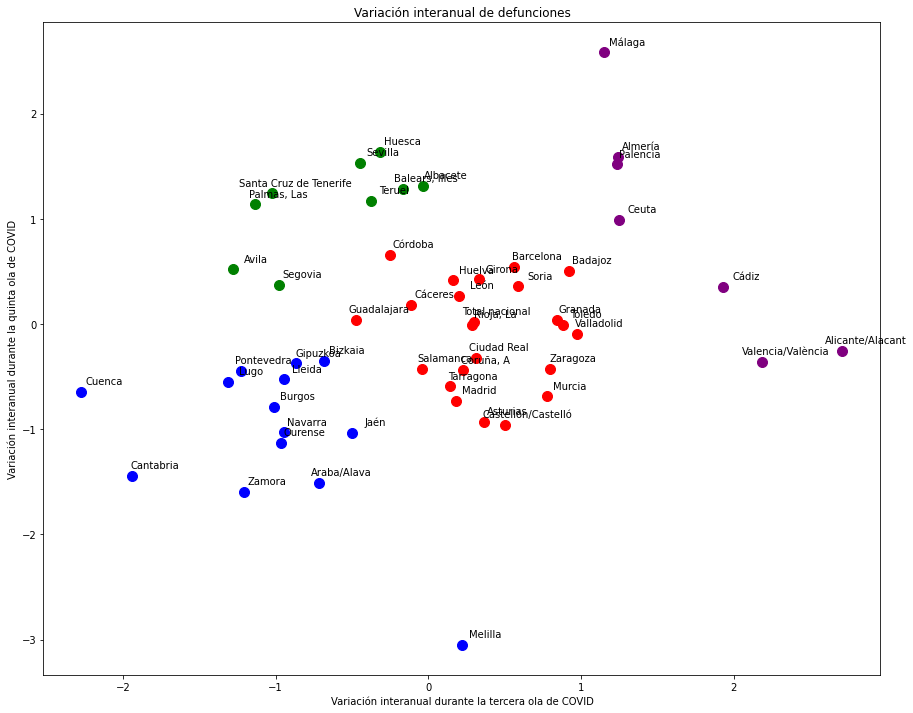

In [66]:
def situacion(x,y,z):
    fig, ax = plt.subplots()
    for i in range(53):       
      ax.text(x[i]+0.15,y[i]+0.1, z[i], color = 'black', ha = 'center', va = 'center') 
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la tercera ola de COVID')
    ax.set_ylabel('Variación interanual durante la quinta ola de COVID')
    fig.set_figheight(12)
    fig.set_figwidth(15)
    fig.show()
    plt.scatter(resultado_escalado[clusters.labels_==0,0],resultado_escalado[clusters.labels_==0,1],s=100, c='purple',label='Cluster1')
    plt.scatter(resultado_escalado[clusters.labels_==1,0],resultado_escalado[clusters.labels_==1,1],s=100, c='blue',label='Cluster2')
    plt.scatter(resultado_escalado[clusters.labels_==2,0],resultado_escalado[clusters.labels_==2,1],s=100, c='green',label='Cluster3')
    plt.scatter(resultado_escalado[clusters.labels_==3,0],resultado_escalado[clusters.labels_==3,1],s=100, c='red',label='Cluster4')

situacion(resultado_escalado[:,0],resultado_escalado[:,1],provincias)

En este caso encontramos resultados más homogéneos, ya que gran parte de las provincias se situan en el centro del gráfico, por lo que no hay grandes diferencias entre ambas olas. Sin embargo, si podemos observar algunas diferencias, por ejemplo, el cluster azul corresponde a las provincias donde hubo un menor exceso de muerts en ambas olas, Melilla vuelve a ser uno de los casos extremos, ya que en la quinta ola presentó cifras de fallecidos por debajo de la media de los años 2017, 2018 y 2019. En las provincias del cluster rojo las dos olas tuvieron un impacto similar. Las que se encuentras en el cluster verde sufrieron un mayor impacto en la quinta ola. por último, las que se encuentran en el cluster morado tuvieron un fuerte impacto en ambas olas, donde podemos encontrar los dos mayores excesos, en este caso, en la tercera ola fueron Valencia y Alicante las más afectadas, y Málaga en la quinta ola. 